# Imports

Import basic libraries and csv files

In [29]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/3 day timestep'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
data = data.sort_values(by = 'Date')

data

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
411,33,1475280000000,4928,0.358844,278.001125,1.501043e+07,0.009773,0.009775,0.109784
415,41,1475280000000,5063,0.336907,277.856594,1.449688e+07,0.008040,0.008041,0.152589
414,40,1475280000000,4993,0.722119,272.647610,1.589596e+07,0.006098,0.006101,0.062324
413,35,1475280000000,5658,0.423656,275.049384,1.506655e+07,0.010154,0.010154,0.137122
412,34,1475280000000,6112,0.490032,274.207912,1.543651e+07,0.010066,0.010067,0.148383
...,...,...,...,...,...,...,...,...,...
8447,7477,1616889600000,4375,0.761055,271.115761,2.008918e+07,0.003370,0.003424,0.005600
7202,7486,1616889600000,4751,0.437183,273.960732,2.010965e+07,0.004119,0.004121,0.000000
8454,7505,1616889600000,5240,0.838794,263.868935,1.979904e+07,0.000773,0.000781,0.006160
8449,7488,1616889600000,2052,0.491569,275.095742,1.875516e+07,0.002054,0.002083,0.037172


# Data preprocessing

In [4]:
dt = data
# dt = dt[dt['snowmelt_calc']!=0]
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
411,33,1475280000000,0.738631,0.358844,0.872368,0.599344,0.009773,0.009775,0.109784
415,41,1475280000000,0.768433,0.336907,0.868954,0.573335,0.008040,0.008041,0.152589
414,40,1475280000000,0.752980,0.722119,0.745932,0.644193,0.006098,0.006101,0.062324
413,35,1475280000000,0.899779,0.423656,0.802655,0.602187,0.010154,0.010154,0.137122
412,34,1475280000000,1.000000,0.490032,0.782782,0.620924,0.010066,0.010067,0.148383


In [5]:
X = dt[['skin_temperature','elevation','forecast_albedo','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122,
                                                    shuffle = False)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
411     0.109784
415     0.152589
414     0.062324
413     0.137122
412     0.148383
          ...   
6256    0.025070
5403    0.000000
6258    0.038389
5366    0.000000
6259    0.003295
Name: snowmelt_calc, Length: 5919, dtype: float64
6262    0.002396
5421    0.000000
5350    0.000000
6261    0.000743
6260    0.011011
          ...   
8447    0.005600
7202    0.000000
8454    0.006160
8449    0.037172
8455    0.001224
Name: snowmelt_calc, Length: 2537, dtype: float64


In [6]:
train_X

,skin_temperature,elevation,forecast_albedo,surface_solar_radiation_downwards,total_precipitation,snow_acc
411,0.872368,0.738631,0.358844,0.599344,0.009773,0.009775
415,0.868954,0.768433,0.336907,0.573335,0.008040,0.008041
414,0.745932,0.752980,0.722119,0.644193,0.006098,0.006101
413,0.802655,0.899779,0.423656,0.602187,0.010154,0.010154
412,0.782782,1.000000,0.490032,0.620924,0.010066,0.010067
...,...,...,...,...,...,...
6256,0.759808,0.561369,0.500001,0.069951,0.011625,0.012261
5403,0.420124,0.899779,0.802088,0.357846,0.001827,0.001873
6258,0.765154,0.561369,0.503872,0.036826,0.031168,0.032181
5366,0.676138,0.564459,0.629401,0.075403,0.027470,0.028297


In [7]:
train_X.shape

(5919, 6)

# Model creation and testing

## Model Architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60)               5940      
 l)                                                              
                                                                 
 p_re_lu (PReLU)             (None, 60)                60        
                                                                 
 dense (Dense)               (None, 64)                3904      
                                                                 
 p_re_lu_1 (PReLU)           (None, 64)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,033
Trainable params: 10,033
Non-trainable params: 0
____________________________________________________

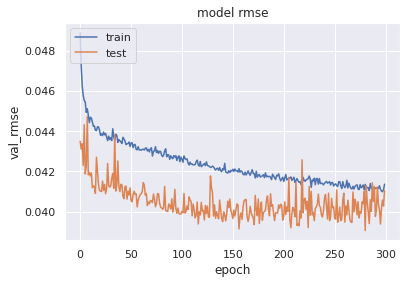

0.04136126860976219 0.04103676974773407


In [8]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # create and fit the LSTM network
# model = Sequential()
# model.add(Bidirectional(GRU(30),input_shape = (6,1)))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(64,activation = None))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(1,activation = 'gelu'))
# reduce_lr = ReduceLROnPlateau(monitor='loss', mode ='min',factor=0.4,
#                               patience=10, min_lr=0.000000001)
# checkpoint_filepath = '/content/temp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_root_mean_squared_error',
#     mode='min',
#     save_best_only=True)

# model.compile(loss=tf.keras.losses.MeanSquaredError(),
#               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0006),
#               metrics=['RootMeanSquaredError'])
# print(model.summary())
# history = model.fit(train_X, train_y,callbacks = [model_checkpoint_callback],validation_split=0.3, epochs=300, verbose=0)
# plt.plot(history.history['root_mean_squared_error'])
# plt.plot(history.history['val_root_mean_squared_error'])
# plt.title('model rmse')
# plt.ylabel('val_rmse')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# print(history.history['root_mean_squared_error'][-1],history.history['val_root_mean_squared_error'][-1])

## Model results and testing

In [23]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/3_day_model')

In [24]:
# model.load_weights(checkpoint_filepath)

In [25]:
# Model prediction
temp= model.predict(test_X)
temp[temp<0]=0

#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))
print('MSE:',mse,'RMSE:',rmse,'MAE:',mae,'R2:',r2)

MSE: 0.0014969974999234764 RMSE: 0.03869105193611924 MAE: 0.026931544375521685 R2: 0.23318111077768156


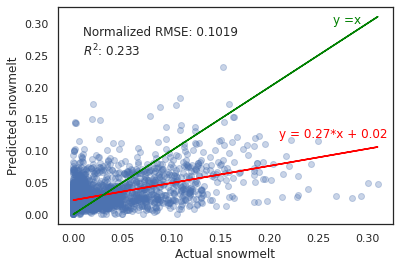

In [31]:
#Visualization of results
plt.scatter(test_y,temp,cmap = 'virdis',alpha = 0.3)
m, b = np.polyfit(test_y, temp, 1)
# Slope and intercept of polyfit line
slope = float(m)
intercept = float(b)

plt.xlabel('Actual snowmelt')
plt.ylabel('Predicted snowmelt')
plt.plot(test_y, m*test_y + b,color = 'red')
plt.plot(test_y, 1*test_y + 0,color = 'green')
plt.text(0.01,0.25, 'Normalized RMSE: '+str(np.round(norm_rmse,4))+'\n$R^2$: '+str(np.round(r2,3)))
plt.text(0.21,0.12, 'y = '+str(round(slope,2))+'*x + '+str(round(intercept,2)),color = 'red',fontsize = 12)
plt.text(0.265,0.3, 'y =x',fontsize = 12,color = 'green')
plt.savefig('3_day_graph.tif',dpi = 300)
plt.show()

In [27]:
print('MSE:',mse,'\nRMSE:',rmse,'\nMAE:',mae,'\nR2:',r2,'\nNormalized RMSE:',norm_rmse,'\nSlope:',m,'\nIntercept:',b)

MSE: 0.0014969974999234764 
RMSE: 0.03869105193611924 
MAE: 0.026931544375521685 
R2: 0.23318111077768156 
Normalized RMSE: 0.10188424085004134 
Slope: [0.26881377] 
Intercept: [0.02245589]


In [22]:
# model.save('/content/drive/MyDrive/Models/3_day_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/3_day_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/3_day_model/assets
